In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import sys

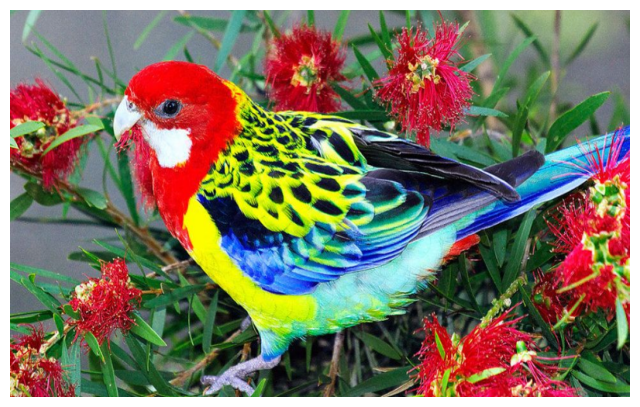

In [2]:
caminhoImagem = './dataset/example1.jpg' # Substitua por seu caminho de imagem
imagem_bgr = cv2.imread(caminhoImagem)
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)
imagem = cv2.resize(imagem_rgb, dsize=(800, 500))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(imagem)
plt.show()

In [3]:
# Nome da imagem
nomeImagem = f"{caminhoImagem.split('/')[-1].split('.')[0]}"

print(nomeImagem)

example1


In [4]:
# Clonando a imagem
cloneImagem = imagem.copy()

# Recuperando as informaçẽos da imagem
altura, largura, canais = cloneImagem.shape

print(f"Altura: {altura}, largura: {largura}, canais: {canais}")

Altura: 500, largura: 800, canais: 3


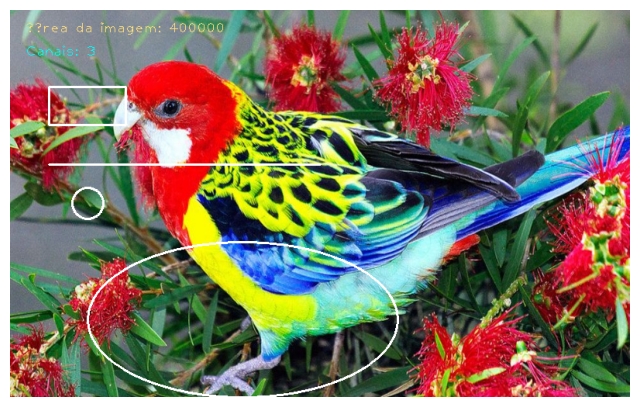

In [5]:
# Colocar texto na imagem clone
cv2.putText(cloneImagem, "Área da imagem: "+str(largura*altura), (20, 30), 1, 1.2, (255, 222, 124), 1)
cv2.putText(cloneImagem, "Canais: "+str(canais), (20, 60), 1, 1.2, (0, 255, 255), 1)

# Dessenhar formas geométricas na imagemm
cv2.rectangle(cloneImagem, (50, 100, 100, 50), (255, 255, 255), 2)
cv2.line(cloneImagem, (50, 200), (400, 200), (255, 255, 255), 2)
cv2.circle(cloneImagem, (100, 250), 20, (255, 255, 255), 2)
cv2.ellipse(cloneImagem, (300, 400), (100, 200), 90, 0, 360, (255, 255, 255), 2)

cv2.imwrite('imagem_Clone.jpg', cloneImagem) # Salvar imagem

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloneImagem)
plt.show()

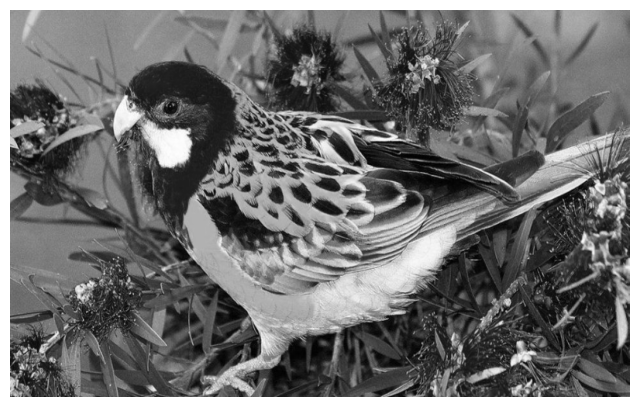

In [6]:
# Converter para escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cv2.cvtColor(cinza, cv2.COLOR_BGR2RGB))
plt.show()

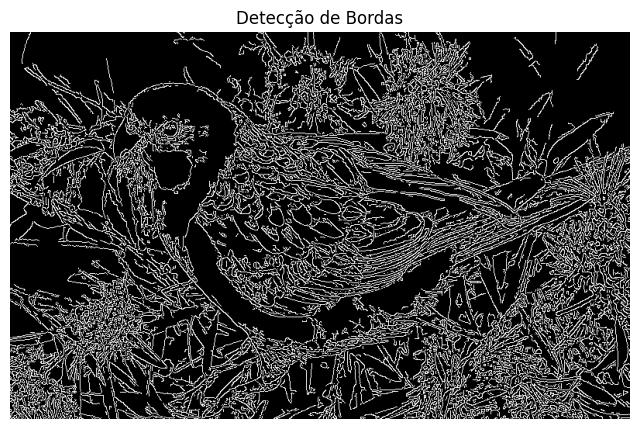

In [7]:
# Detecção de bordas
bordas = cv2.Canny(imagem, 100, 200)

plt.figure(figsize=(8,8))
plt.title('Detecção de Bordas')
plt.axis('off')
plt.imshow(cv2.cvtColor(bordas, cv2.COLOR_BGR2RGB))
plt.show()

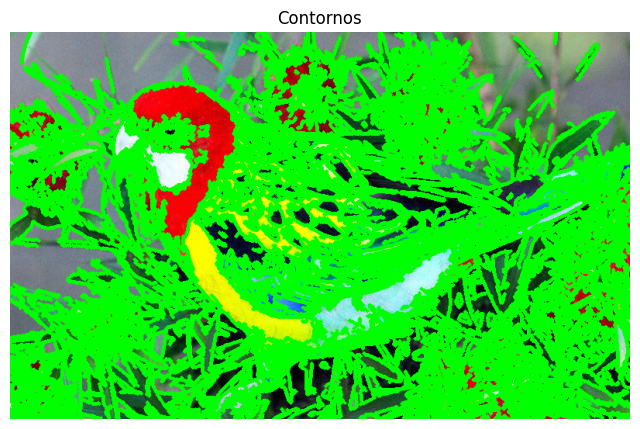

In [8]:
# Encontrando contornos
contornos, _ = cv2.findContours(bordas, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contornosImagem = imagem.copy()
cv2.drawContours(contornosImagem, contornos, -1, (0,255,0), 3)

plt.figure(figsize=(8,8))
plt.title('Contornos')
plt.axis('off')
plt.imshow(contornosImagem)
plt.show()

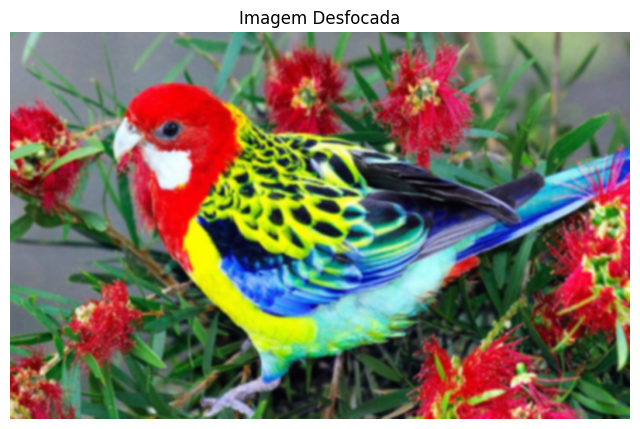

In [9]:
# Aplicar desfoque
desfoque = cv2.GaussianBlur(imagem, (7, 7), 0)

plt.figure(figsize=(8,8))
plt.title('Imagem Desfocada')
plt.axis('off')
plt.imshow(desfoque)
plt.show()

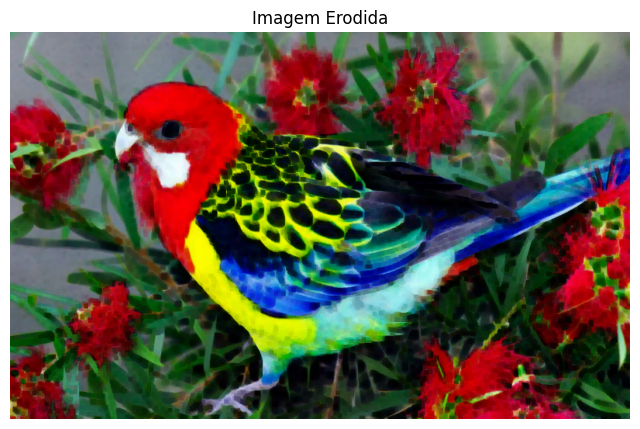

In [10]:
# Erosão
erosão = cv2.erode(imagem, None, iterations=2)

plt.figure(figsize=(8,8))
plt.title('Imagem Erodida')
plt.axis('off')
plt.imshow(erosão)
plt.show()

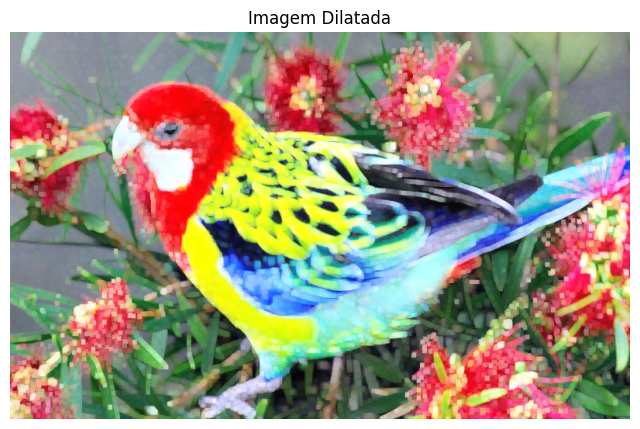

In [11]:
# Dilatação
dilatada = cv2.dilate(imagem, None, iterations=2)

plt.figure(figsize=(8,8))
plt.title('Imagem Dilatada')
plt.axis('off')
plt.imshow(dilatada)
plt.show()

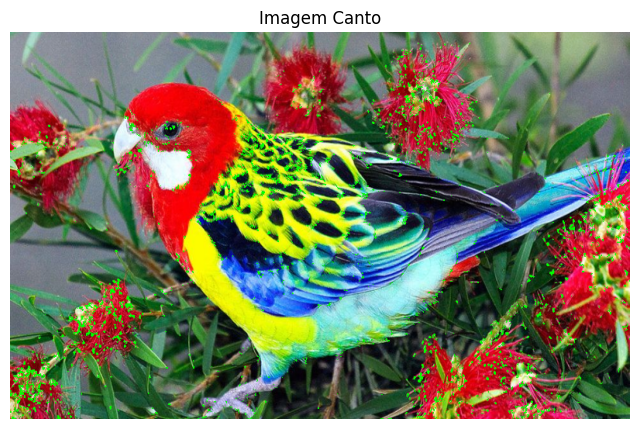

In [12]:
# Detecção de canto com Harris
cinza = np.float32(cinza)
harris_corners = cv2.cornerHarris(cinza, 2, 3, 0.04)
imagem_harris = imagem.copy()
threshold = 0.01 * harris_corners.max()
imagem_harris[harris_corners > threshold] = [0, 255, 0]


plt.figure(figsize=(8,8))
plt.title('Imagem Canto')
plt.axis('off')
plt.imshow(imagem_harris)
plt.show()

In [13]:
# Capturar vídeo
caminhoVideo = "./dataset/video0.mp4"
cap = cv2.VideoCapture(caminhoVideo)

if cap.isOpened() == False:
    print("Video não foi aberto!")
    sys.exit(1)

largura = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
altura = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"largura: {largura}\naltura: {altura}")

contador_imagens = 0

while True:
    lido, imagem = cap.read()

    if not lido:
        break

    contador_imagens += 1

print(f"Total de frames capturados: {contador_imagens}")

largura: 3840
altura: 2160
Total de frames capturados: 352
